# Matplotlib 教程 (一)

## 目录

* [0.前言](#0.前言)
* [1.Matplotlib 的画图的流程](#1.-Matplotlib-的画图的流程)
    * [1.1面对 Matplotlib 流程创建图片](#1.1-面对-Matplotlib-流程创建图片)
    * [1.2面对 Matplotlib 对象创建图片](#1.2-面对-Matplotlib-对象创建图片)
    * [1.3总结](#1.3-总结)
* [2.Matplotlib 的相关属性以及数据结构](#2.-Matplotlib-的相关属性以及数据结构)
    * [2.1.Matplotlib 的相关默认配置参数](#2.1-Matplotlib-的相关默认配置参数)
        * [2.1.1.使用 rcParam 参数来配置当前的默认参数](#2.1.1-使用-rcParam-参数来配置当前的默认参数)
        * [2.1.2.使用 StyleSheet 来配置当前的默认参数](#2.1.2-使用StyleSheet来配置当前的默认参数)
        * [2.1.3.总结](#2.1.3-总结)
    * [2.2.Matplotlib 的画布](#2.2-Matplotlib-的画布)
    * [2.3.Matplotlib 的坐标轴[AX]](#2.3-Matplotlib-的坐标轴[AX])
        * [2.3.1.给画布添加子图](#2.3.1-给画布添加子图)
        * [2.3.2.给画布添加坐标轴](#2.3.2-给画布添加坐标轴)
        * [2.3.3.总结](#2.3.3-总结)

## 0.前言

<img src="https://matplotlib.org/_static/logo2_compressed.svg" width = "350" height = "200" alt="图片名称" align=center />

在 Python 可视化中，比较著名的开源模块库(Module)是 `Matplotlib` 和 `Seaborn`，使用这两个库可以完成绝大多数的数据可视化任务，掌握数据可视化不仅仅是顺应当前大数据时代的要求，更可以在平常的工作中使用数据可视化提升我们制作报表、报告的能力，也许你会觉得使用 Excel 表格也可以完成数据可视化的任务，**那么为什么要用这么复杂的办法来画图呢**？

对于一个熟练经常使用Excel的技术人员来说，使用Excel是非常方便的，但是Excel带来的问题也非常显著，就是大量、重复机械的工作占据了日常工作的大多数时间，对于一个Excel文件也许使用其自带的功能来画图还OK，但是10个文件呢？100个文件呢？1000个文件呢？如果涉及到文件内容的拼接怎么办呢？这时候必须要考虑使用自动化的方法来处理大量的文件和完成重复的工作，这时候 **Python** 就非常重要了；

Python 提供了处理Excel文件的模块库 - Pandas，数据可视化库 - Matplotlib 和 Seaborn，提供了面向流程和面向对象的方式，帮助你通过编写一次代码就可以处理许多重复、繁琐的工作内容；

Python 真的可以为你节省大量的时间以及重复工作，所谓人生苦短我用Python；

OK...

其实这么多年使用 Matplotlib，前段时间自己在处理一些问题的时候发现自己对于 Matplotlib 的一些编程问题了解的不够透彻，所接触和完成的数据可视化任务都是为了完成而完成，对于其中的一些问题并没有真的去了解和认真分析，因此我想是时候静下心来总结和撰写关于 Matplotlib 教程，撰写教程和相关博客是一件非常酷的事情；

**希望看到这篇教程的你请提出宝贵的意见或者指出不清楚、不清晰、你不能理解的地方，我会尽快解答、并更新教程**；

Enjoy this tour!

完成本教程需要具有以下的相关知识储备：

+ 对于 Python 有一定的编程基础，对于常见的 Python 语法、数据结构有一定的了解；
+ 对 Pandas、Numpy 等开源数据处理模块的用法有一定的了解；

<br>

**Matplotlib Version: 3.4.2**

<br>

In [1]:
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.__version__

'3.4.2'

## 1. Matplotlib 的画图的流程

对于 Matplotlib 的画图流程，简要分为两种，第一种方法是`面对 Matplotlib 流程`进行操作，即不需要创建新的实例对象，Matplotlib 会自己继承相关的属性，从而快速做图；第二种方法是`面对 Matplotlib 对象`进行操作，即声明和创建对应的实例，通过实例进行操作；

<br>

### 1.1 面对 Matplotlib 流程创建图片

Matplotlib 可以允许不创建对象的前提下通过函数直接创建相关图片，官方文档将这种创建的图片的方式称为：`MATLAB-user-Friendly` 风格；
 
在这种模式中，不需要创建 Matplotlib 的实例对象，只需要记住当前创建的“状态”，Matplotlib 已经集成了了对应的 API，这种 API 的类型被称为：`stateful interface`，即 Matplotlib 自己初始化了必要的相关内建属性，在调用相关API的时候就已经给内建的属性进行赋值了；

使用这种方式进行绘图的优点是：

+ 不需要对实例对象进行操作，降低了代码的复杂度，减少了开发的难度；
+ 使用内建的属性，如果你很清楚创建图片的流程，并不容易出错；

缺点：

+ 对于复杂的图像，没有对象操作可能容易陷入混乱；
+ 不容易阅读、维护相关代码；


```python

>>> import matplotlib as mpl
>>> import matplotlib.pyplot as plt
>>> plt.figure(figsize=(3,3))
>>> plt.subplot(1,2,1)
>>> plt.plot([1,2,3],[1,2,3])
>>> plt.subplot(1,2,2)
>>> plt.plot([1,2,3],[3,1,2])
>>> plt.show()
```
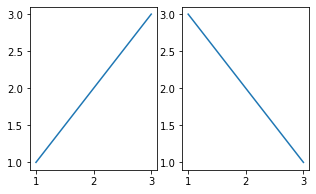

<br>

### 1.2 面对 Matplotlib 对象创建图片

类似于其他的API的标准，大多数 Matplotlib 的 API 都会返回对象(Matplotlib.Artist)，区别于面向过程的编程形式，在进行 Matplotlib 图像编程的时候，会创建多个对象，对于绘图的流程、对图像的相关属性调整，我们通过创建的对象对应的函数进行调整；



使用这种方式进行绘图的优点是：

+ 使绘制图片的过程变得容易理解，对对象的操作更加细粒度可以对相关属性操控更加具体；

缺点：

+ 不是非常方便，需要创建多个对象进行操作，对对象的管理和相关函数调用需要查阅API文档，意味着你需要对API更加熟悉；

```python
>>> import matplotlib as mpl
>>> import matplotlib.pyplot as plt
>>> fig = plt.figure(figsize=(3,3))
>>> ax1 = plt.subplot(1,2,1)
>>> ax1.plot([1,2,3],[1,2,3])
>>> ax2 = plt.subplot(1,2,2)
>>> ax2.plot([1,2,3],[3,1,2])
>>> plt.show()
```
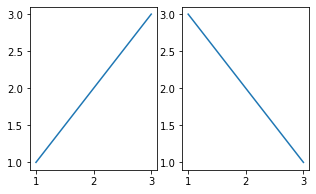

<br>

### 1.3 总结

从上边的简单演示，我们知道了两种创建 Matplotlib 的方式，第一种 “面对过程的方式” 适用于快速创建图片，对于并不复杂的图片，这种方式非常适用；第二种“面对对象的方式”适用于复杂的图片，或者需要对图片的相关属性参数进行个性化调整；

在本教程中，我们使用“面对对象的方式(OO Interface)” 进行代码演示和相关概念讲解；

<br>

## 2. Matplotlib 的相关属性以及数据结构

对于 Matplotlib 的图片构成元素，可以参考下边的图片：

![](https://files.realpython.com/media/anatomy.7d033ebbfbc8.png)

Matplotlib 的 组成属性层次：

![](http://assets.processon.com/chart_image/61137dd15653bb6d0a7520b4.png)

<br>

### 2.1 Matplotlib 的相关默认配置参数

Matplotlib 提供了相关的默认参数，默认参数的配置有两种，第一种是：使用 `StyleSheet` 来出实话相关配置；第二种是：使用 `rcParam`来进行参数配置；

一般来说，第二种的方法用的比较多，因此一般来说推荐第二种方法来处理相关的默认参数，比如说：在图表中显示汉字、设置坐标轴的相关维度、背景特征等等；


#### 2.1.1 使用 rcParam 参数来配置当前的默认参数

下边的代码可以打印出相关的配置文件目录，配置文件的文件名为 `matplotlibrc`；

```python
>>> import matplotlib
>>> matplotlib.matplotlib_fname()
*/*/matplotlibrc
```
```python
>>> matplotlib.rcParams()
RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          ...
          'ytick.minor.pad': 3.4,
          'ytick.minor.right': True,
          'ytick.minor.size': 2.0,
          'ytick.minor.visible': False,
          'ytick.minor.width': 0.6,
          'ytick.right': False})
```

在上边的代码，我们可以返回对应的相关的默认配置信息，下边尝试打印 Matplotlib 的默认字体；

```python
>>> matplotlib.rcParams["font.sans-serif"]
['DejaVu Sans',
 'Bitstream Vera Sans',
 'Computer Modern Sans Serif',
 'Lucida Grande',
 'Verdana',
 'Geneva',
 'Lucid',
 'Arial',
 'Helvetica',
 'Avant Garde',
 'sans-serif']
# 可以看到目前Matolotlib支持的默认相关字体
```
<br>

尝试改变默认字体，即我们可以指定我们需要的字体，有两种方法：使用 `matplotlib` 和 `matplot;ib.pyplot` 来重新更改对应的字体，演示代码如下：

```python
>>> import matplotlib
>>> import matplotlib.pyplot as plt
>>> matplotlib.rcParams["font.sans-serif"] = "SimHei"
>>> matplotlib.rcParams["font.sans-serif"]
['SimHei']
>>> plt.rcParams["font.sans-serif"]
['SimHei']
# 上边的配置在重启 Matplotlib 模块之后就会被改变
# 如果你不想重置你的运行器，可以使用下边的命令：
>>> matplotlib.rcParams.update(matplotlib.rcParamsDefault)
```

<br>

#### 2.1.2 使用StyleSheet来配置当前的默认参数

Matplotlib 也提供了 `style` 的配置参数来方便批量配置参数，借用 `javascript` 的相关配置说法，即为配置的图片增加一个 `stylesheet` 来集成所有的配置信息；

调用的相关方法如下：

```python
>>> import matplotlib.pyplot as plt
>>> import matplotlib as mpl
# 查看所有的可用的 已经配置好了的 StyleSheet 类型
>>> plt.style.available
['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']
# 我们可以直接选用上边默认的 StyleSheet 类型
>>> plt.style.use('ggplot')
```

<br>

如果我们想要自定义自己的相关风格，也可以将所有的配置信息参考 API 链接： [matplotlib.style.use](https://matplotlib.org/stable/api/style_api.html#matplotlib.style.use)

参考的可以进行配置的相关属性的命令为：

```python
>>> matplotlib.style.library
{'_classic_test_patch': RcParams({'text.kerning_factor': 6, 'ytick.alignment': 'center_baseline'}),
 'seaborn-dark': RcParams({'axes.axisbelow': True,
           'axes.edgecolor': 'white',
           'axes.facecolor': '#EAEAF2',
           'axes.grid': False,
           'axes.labelcolor': '.15',
           'axes.linewidth': 0.0,
           ...
 ...
        'seaborn-deep': RcParams({'axes.prop_cycle': cycler('color', ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']),
           'patch.facecolor': '#4C72B0'})}                    
```

<br>

创建自己的配置文件 `./images/demo.mplstyle`

```shell
vim ./images/demo.mplstyle
lines.markersize : 10
xtick.labelsize : 16
ytick.labelsize : 16
```

```python
>>> import matplotlib.pyplot as plt
>>> plt.style.use('./images/demo.mplstyle')
```

<br>

#### 2.1.3 总结


因此我们在进行相关图像配置（坐标轴刻度、坐标轴单位、图像字体等）的时候目前已经有以下几种方法：

+ 使用 `matplotlib.rcParams[<keys>]` 临时配置相关的参数配置；
+ 使用 `matplotlib.plt.rcParams[<keys>]` 临时配置相关的参数配置；
+ 使用 `matplotlib.style.use(<default_stylesheet_name>)` 来选用默认的 StyleSheet；
+ 使用 `matplotlib.style.use(<style_file_path>)` 来创建自己的 StyleSheet 文件，在文件中加入自己的配置；

官方指导文档：

+ [Customizing Matplotlib with style sheets and rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.html)



### 2.2 Matplotlib 的画布

Matplotlib 的所有图像都是画在画布(figure)上的，因此如果你想要画出一副图像，首先必须要创建画布，画布是一个对象，因此如果你想要画出一副通过函数： `matplotlib.pyplot.figure` 函数来进行创建；

`matplotlib.pyplot.figure()`:

+ `num`: 指定一个特殊的数字来指明该图像是独一无二的，用来区分不同的图像，你可以使用这个参数来指定你新创建的图像，如果图像是新创建的，那么这个参数可以为空，系统会自动指定一个数字来区分新建的图片； 如果这个参数已经被指定，那么会返回对应的指定数字代表的图像；
+ `figsize`: 指定图像的大小，图像的单位为：英寸(inch)；
+ `dpi`: 指定图像的分辨率，默认的分辨率为：100；
+ `facecolor`: 指定背景的颜色， 默认为： white - 白色；
+ `edgecolor`: 指定边框的颜色，默认为： white - 白色；
+ `frameon`: Bool 类型值，默认为：False，即关闭图像压缩，如果设置为：True 图片的像素将会被压缩；
+ `linewidth`： Float 指定边框线条的宽度；
+ `subplotpars`： 指定多个子图时的相关参数, 默认为：`rcParams["figure.subplot.*"]`;
+ `tight_layout`: Bool or Dict，默认的参数为：`rcParams["figure.autolayout"]`/ False，用来调整图片的大小，来适应子图的边框大小;
+ `constrained_layout`: Bool，默认参数为：False，如果参数为 `True`，那么就会使用受约束(constrained)的布局来调整绘图元素的位置，相比于 `tight_layout`的参数，这个参数会更加宽松；

<br>

返回的对象是：`matplotlib.figure.Figure`

In [2]:
# 下边就来举几个例子，来使用
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3,3), dpi=100)
# 即我们在没有设定 num 参数的时候，自动被指定一个参数值,按照图片的顺序看来进行
print(fig.number)
print(id(fig)) # 打印ID

1
140192170130128


<Figure size 300x300 with 0 Axes>

In [3]:
# 通过 Python 的内嵌方法，我们可以清楚地知道所有fig的属性类型
# 当然在这里可以打印出所有的属性
for item in fig.__dict__.items():
    print(item)

('_stale', False)
('stale_callback', None)
('figure', <Figure size 300x300 with 0 Axes>)
('_transform', None)
('_transformSet', False)
('_visible', True)
('_animated', False)
('_alpha', None)
('clipbox', None)
('_clippath', None)
('_clipon', True)
('_label', '')
('_picker', None)
('_contains', None)
('_rasterized', False)
('_agg_filter', None)
('_mouseover', False)
('_callbacks', <matplotlib.cbook.CallbackRegistry object at 0x7f8108803a90>)
('_remove_method', None)
('_url', None)
('_gid', None)
('_snap', None)
('_sketch', None)
('_path_effects', [])
('_sticky_edges', _XYPair(x=[], y=[]))
('_in_layout', True)
('_suptitle', None)
('_supxlabel', None)
('_supylabel', None)
('_align_label_groups', {'x': <matplotlib.cbook.Grouper object at 0x7f8108803d50>, 'y': <matplotlib.cbook.Grouper object at 0x7f8108803d10>})
('_gridspecs', [])
('_localaxes', <matplotlib.figure._AxesStack object at 0x7f81385c2810>)
('artists', [])
('lines', [])
('patches', [])
('texts', [])
('images', [])
('legends', []

In [4]:
# 我们使用相关的参数类型
fig_copy = plt.figure(num=1)
# 打印ID我们发现是与前边创建id的相同，即为同一个图像，但是图像的大小发生了改变；
# 这个具体为什么会改变的原因暂不知
print(id(fig))

140192170130128


<Figure size 432x288 with 0 Axes>

### 2.3 Matplotlib 的坐标轴[AX]

我们已经了解了 `Matplotlib` 的第一步就是创建画布，现在我们需要了解如何在 `Matplotlib` 中创建坐标轴，`Matplotlib` 使用坐标轴来定位图像和像素信息，因此 坐标轴-ax 的概念在绘图中非常重要，像 `matplotlib.pyplot.annotate` 、`matplotlib.pyplot.text`函数都需要根据坐标轴来进行绘图；

#### 2.3.1 给画布添加子图

此外，坐标轴的划分可以将一块画布(`Figure`) 划分称为多个区域，从而实现多重构图；

+ `Figure.add_subplot()`
    + 该方法将会返回 `Axes` 实例对象， `Axes` 对象可以完成绘图的相关功能和设置坐标轴参数；
    + API:   [Figure.add_subplot API](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot)
    + `*args`： 定义了子图的大小以及位置，指定的类型为 `int` 或者一个三元组，举一个例子：fig.add_subplot(132)，即为图片`fig`进行子图的划分，划分子图总行数(row)为：1，总列数(col)为：3，返回的子图位置(index)为：第1行第2个子图；最后的子图位置，是由行、列值推算出来的，行数为2，列数为2，则子图的位置排序为：1,2,3,4,按照从左到右的顺序；<br>
    此外，子图的 index 也可以被指定称为元组的形式，比如：fig.add_subplot(1,3,(2,3))，代表当前子图占据3个子图的 2 和 3 的位置；
    + `projection`: 映射的类型，这里比较常用的类型是：`rectilinear` - 线性映射；
    + `polar`: Bool，使用极坐标，当这个值被设置称为 `True` 时，`projection` 就被设置称为 `polar`;
    + ```python
      >>> ax = fig.add_subplot(111)
      >>> type(ax)
      matplotlib.axes._subplots.AxesSubplot
      ```
    + ```python
      >>> import matplotlib.pyplot as plt
      >>> import numpy as np
      >>> fig = plt.figure(figsize=(10,3))
      >>> x = np.linspace(1.0,10.0,10)
      >>> y = np.sin(x)
      >>> ax1 = fig.add_subplot(121)
      >>> ax2 = fig.add_subplot(122)
      >>> ax1.plot(x,y)
      >>> ax2.plot(x,y)
      >>> ax1.set_title("fig1")
      >>> ax2.set_title("fig2")
      >>> plt.show()
      ```
      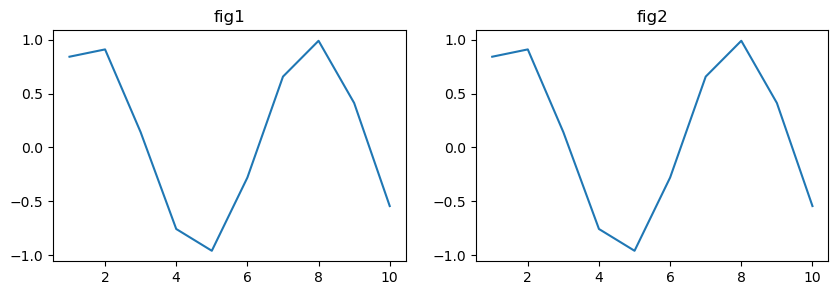

<br>

#### 2.3.2 给画布添加坐标轴
+ `Figure.add_axes(self, *args, **kwargs)`
    + 给画布添加坐标轴，添加的坐标轴,坐标轴的位置根据 `rect` 参数指定；
    + API: [Figure.add_](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_axes)
    + `rect`: 指定坐标轴的位置：(left, bottom, width, height)，每一个位置对应一个 float 值，即决定坐标轴的位置；
    + `projection`: 映射，与 `add_subplot` 保持一致；

<br>

#### 2.3.3 总结

对于这两种给 `Figure` 添加对象的相关属性，两种方法的方法返回的都是 `Axes` 对象，用于锁定画图的位置和进行坐标轴的定制化的操作；

如果不需要对画布进行划分子图，那么使用 `add_axes` 函数添加坐标轴；

如果需要划分子图，那么就使用 `add_subplot` 函数添加多个子坐标；

`Axes` 对象可以用来操纵最基本的元素，即可以进行下边的操作，这些操作在之后会具体进行讲解，这里需要对这个概念有一个相关的印象:

+ [Axes API](https://matplotlib.org/stable/api/axes_api.html)



In [5]:
ax = fig.add_subplot(211)
for item in ax.__dict__.items():
    print(item)

('_stale', True)
('stale_callback', <function _stale_figure_callback at 0x7f81386095f0>)
('_axes', <AxesSubplot:>)
('figure', <Figure size 300x300 with 1 Axes>)
('_transform', None)
('_transformSet', False)
('_visible', True)
('_animated', False)
('_alpha', None)
('clipbox', None)
('_clippath', None)
('_clipon', True)
('_label', '')
('_picker', None)
('_contains', None)
('_rasterized', False)
('_agg_filter', None)
('_mouseover', False)
('_callbacks', <matplotlib.cbook.CallbackRegistry object at 0x7f81086a7c50>)
('_remove_method', <bound method FigureBase.delaxes of <Figure size 300x300 with 1 Axes>>)
('_url', None)
('_gid', None)
('_snap', None)
('_sketch', None)
('_path_effects', [])
('_sticky_edges', _XYPair(x=[], y=[]))
('_in_layout', True)
('_position', Bbox([[0.125, 0.5368181818181819], [0.9, 0.88]]))
('_originalPosition', Bbox([[0.125, 0.5368181818181819], [0.9, 0.88]]))
('_aspect', 'auto')
('_adjustable', 'box')
('_anchor', 'C')
('_stale_viewlim_x', False)
('_stale_viewlim_y', F

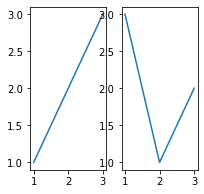

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3,3))
ax1 = plt.subplot(1,2,1)
ax1.plot([1,2,3],[1,2,3])
ax2 = plt.subplot(1,2,2)
ax2.plot([1,2,3],[3,1,2])
plt.show()